In [7]:
from oandapyV20 import API
from oandapyV20.exceptions import V20Error
import oandapyV20.endpoints.instruments as instruments
from oandapyV20.definitions.instruments import CandlestickGranularity

import datetime
import matplotlib.pyplot as plt


In [8]:
# Helper function to convert datetime string to datetime object
def to_datetime(t):
    return datetime.datetime.strptime(t[0:-4], '%Y-%m-%dT%H:%M:%S.%f') 


# TODO: Check how current timestep looks 

In [31]:
# granularities = CandlestickGranularity().definitions.keys()
# Define parameters
granularity = 'M2'
From = "2020-10-20"
To = "2020-10-25"
i = 'EUR_USD' # Instrument - first is base currency, second quote currency
                                # I think base should always be EUR for this acct
params = {
    'from': From,
    'to': To,
    'granularity': 'H2',
}
# Compile request
r = instruments.InstrumentsCandles(instrument=i, params=params)

# Define API with our access token (for demo acct)
api = API(access_token='378d83764609aa3a4eb262663b7c02ef-482ed5696d2a3cede7fca4aa7ded1c76')

# Request candles
rv = api.request(r)

In [32]:
print(rv.keys())
print(rv['candles'][0].keys())
print(rv['candles'][0]['mid'].keys())
print(rv['candles'][1]['mid'])
print(rv['candles'][-1])
print(rv['candles'][0]['volume'])
print(rv['candles'][0]['complete'])

dict_keys(['instrument', 'granularity', 'candles'])
dict_keys(['complete', 'volume', 'time', 'mid'])
dict_keys(['o', 'h', 'l', 'c'])
{'o': '1.17772', 'h': '1.17806', 'l': '1.17667', 'c': '1.17672'}
{'complete': True, 'volume': 2623, 'time': '2020-10-23T19:00:00.000000000Z', 'mid': {'o': '1.18584', 'h': '1.18650', 'l': '1.18568', 'c': '1.18612'}}
1845
True


In [5]:
# Extract c values from the candles, and corresponding timestamps
# Not sure what the c value means, see above

c = [float(candle['mid']['c']) for candle in rv['candles']] # center? values
t = [to_datetime(candle['time']).timestamp() for candle in rv['candles']] # time values
dates = [to_datetime(candle['time']).date() for candle in rv['candles']]
print(c)
print(t)

[1.24138, 1.21946, 1.23241, 1.2079, 1.16941, 1.16847, 1.16908, 1.16019, 1.16027, 1.13117, 1.13159, 1.14649, 1.14474, 1.13706, 1.12178, 1.12151, 1.11688, 1.13721, 1.10766, 1.09905, 1.08986, 1.11514, 1.10191, 1.1212, 1.10945]
[1514754000.0, 1517432400.0, 1519851600.0, 1522522800.0, 1525114800.0, 1527793200.0, 1530385200.0, 1533063600.0, 1535742000.0, 1538334000.0, 1541016000.0, 1543611600.0, 1546290000.0, 1548968400.0, 1551387600.0, 1554058800.0, 1556650800.0, 1559329200.0, 1561921200.0, 1564599600.0, 1567278000.0, 1569870000.0, 1572552000.0, 1575147600.0, 1577826000.0]


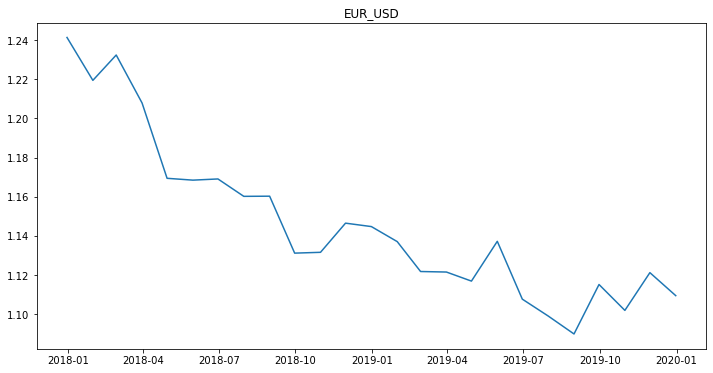

In [6]:
# Simple plot

plt.figure(figsize=[12,6])
plt.plot(dates,c)
plt.title("EUR_USD")
plt.show()